# Análisis Exploratorio de Datos: Inversiones en Search Funds

## Introducción

El presente proyecto tiene como objetivo realizar un análisis exploratorio de datos (EDA) para evaluar la viabilidad de priorizar inversiones fuera de España en el contexto de los Search Funds. Actualmente, el mercado español es considerado más desarrollado que otros mercados internacionales (con la excepción de Estados Unidos). Sin embargo, se ha planteado el criterio estratégico de enfocar las inversiones en mercados extranjeros. Nuestra hipótesis inicial sostiene que las inversiones en España son igual o incluso más favorables en términos de rentabilidad y estabilidad.

## Objetivos del Proyecto

1. **Validar la hipótesis:** Comprobar si las inversiones en España presentan ventajas competitivas frente a las realizadas en mercados internacionales.
2. **Explorar y visualizar datos:** Utilizar técnicas de EDA para identificar patrones, relaciones y métricas clave que respalden la toma de decisiones estratégicas.
3. **Proporcionar insights basados en datos:** Generar recomendaciones fundamentadas para optimizar el criterio de inversión geográfica.

## Fuentes de Datos

Los datos provienen de:
- **Base interna de control de operaciones:** Información detallada sobre Search Funds, incluyendo métricas de rentabilidad, riesgo y ubicación geográfica.
- **Estudio del IESE 2024:** "International Search Funds – 2024 Selected Observations", que provee un marco de referencia y contexto estadístico para el análisis.

## Metodología

El análisis se llevará a cabo en las siguientes etapas:
1. **Preparación de datos:** Limpieza y estructuración de los datos para garantizar su calidad y consistencia.
2. **Análisis univariante:** Exploración de variables individuales para identificar distribuciones y métricas clave.
3. **Análisis bivariante y multivariante:** Evaluación de relaciones entre variables para descubrir patrones significativos.
4. **Visualización de resultados:** Creación de gráficos y tablas que respalden las conclusiones.

## Resultado esperado

Este análisis busca confirmar o refutar la hipótesis inicial y proporcionar una base sólida para ajustar o mantener los criterios actuales de inversión. Los hallazgos se presentarán mediante gráficos y visualizaciones que faciliten la interpretación y comunicación de los resultados.

---


In [149]:
# Importamos el "pack" básico de módulos de análisis de datos

import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as patches
import seaborn as sns

In [150]:
# Importamos el excel de la base de datos

df = pd.read_excel("./src/data/Control_Search_Funds.xlsx")

In [151]:
# Le echamos un vistazo preliminar

df

,SEARCH FUND GENERAL DATA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,ACQUISITION FINANCIAL MULTIPLES,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,OPERATION RETURNS,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68
0,Type of Data,List,Formula: Search in list,Formula: Search in list,List,List,Manual Data,Manual Data,Manual Data,Manual Data,...,1.3925,5.288125,8.036042,2.489583,3.810625,Manual Data,Formula: search in Operations Sheet,Formula: search in Operations Sheet,Formula: Investment Search Phase + Investment ...,Formula: Return (€) / Total investment (€)
1,Name,Geo,Geo Group,Status,Status,Comment,Estimated Closing Date,Operating Co Name,Searcher 1,Searcher 2,...,EV/SLS,EV/EBITDA,EV/Avg2 CF,EQ/EBITDA,EQ/avg2 CF,Sale Date,Return (€),Post-acquisition Investments (€),Total CASH invested (€),MoIC
2,Search Fund 1,MEX,South America,10,Sold,C&PIV,NaN,Compañía Operativa 1,Searcher 1,Searcher 2,...,2.84,5.31,6.64,5.31,6.64,2024-08-26 00:00:00,1564735.29,0,310690.09,5.04
3,Search Fund 2,ITA,Europe,10,Sold,CCPP 1,NaN,Compañía Operativa 2,Searcher 1,NaN,...,2.66,6.62,9.49,2.55,3.66,2023-02-28 00:00:00,1532121.77,13336.72,369998.78,4.14
4,Search Fund 3,ESP,Spain,10,Sold,IC,NaN,Compañía Operativa 3,Searcher 1,NaN,...,0.61,4.93,6.33,2.22,2.85,2020-12-11 00:00:00,690042.54,0,130000,5.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,787275.52,NaN,NaN
728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
# Se aprecia que los títulos de las columnas están en la fila 2, y que las filas anteriores o bien están combinadas, 
# o expresan el tipo de dato que el usuario introduce. Procedemos a eliminar esas dos primeras filas. ¡OJO! La primera fila es el índice actual

# Eliminamos la primera fila
df = df.iloc[1:]

# Reasignamos el índice usando la segunda fila como encabezado
df.columns = df.iloc[0]  # Asignar la segunda fila como encabezado
df = df[1:].reset_index(drop=True)  # Eliminar la segunda fila y reiniciar el índice

df

1,Name,Geo,Geo Group,Status,Status,Comment,Estimated Closing Date,Operating Co Name,Searcher 1,Searcher 2,...,EV/SLS,EV/EBITDA,EV/Avg2 CF,EQ/EBITDA,EQ/avg2 CF,Sale Date,Return (€),Post-acquisition Investments (€),Total CASH invested (€),MoIC
0,Search Fund 1,MEX,South America,10,Sold,C&PIV,NaN,Compañía Operativa 1,Searcher 1,Searcher 2,...,2.84,5.31,6.64,5.31,6.64,2024-08-26 00:00:00,1564735.29,0,310690.09,5.04
1,Search Fund 2,ITA,Europe,10,Sold,CCPP 1,NaN,Compañía Operativa 2,Searcher 1,NaN,...,2.66,6.62,9.49,2.55,3.66,2023-02-28 00:00:00,1532121.77,13336.72,369998.78,4.14
2,Search Fund 3,ESP,Spain,10,Sold,IC,NaN,Compañía Operativa 3,Searcher 1,NaN,...,0.61,4.93,6.33,2.22,2.85,2020-12-11 00:00:00,690042.54,0,130000,5.31
3,Search Fund 4,ESP,Spain,10,Sold,IC,NaN,Compañía Operativa 4,Searcher 1,NaN,...,1.69,4.54,7.14,1.81,2.85,2023-07-28 00:00:00,157556,0,137723.6,1.14
4,Search Fund 5,POL,Europe,8,Eq Gap Acquired,CCPP 4,NaN,Compañía Operativa 5,Searcher 1,NaN,...,0.48,4.03,5.32,1.83,2.42,NaN,0,0,269359.31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,787275.52,NaN,NaN
726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
# Evaluamos la cantidad de valores nulos con info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 69 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Name                                               724 non-null    object
 1   Geo                                                724 non-null    object
 2   Geo Group                                          724 non-null    object
 3   Status                                             724 non-null    object
 4   Status                                             724 non-null    object
 5   Comment                                            99 non-null     object
 6   Estimated Closing Date                             6 non-null      object
 7   Operating Co Name                                  284 non-null    object
 8   Searcher 1                                         724 non-null    object
 9   Searcher 2           

De un vistazo, se puede apreciar que la tabla requiere de una gran homogeneización para su análisis. Existen muchos valores nulos, todos los valores son de tipo Object, y hay muchas columnas que no son de utilidad para este análisis.

La primera estrategia que emplearemos será centrarnos únicamente en las columnas de utilidad para el análisis, deshaciéndonos de aquellas que no sean de utilidad.

### Columnas útiles para el objetivo

Dado que buscamos evaluar la rentabilidad y estabilidad de las inversiones en España frente a otros mercados, podemos establecer las siguientes columnas como relevantes en un análisis preliminar:

#### **Identificación básica**
- `Name`: Para identificar el fondo.
- `Geo`: Ubicación geográfica del fondo.
- `Geo Group`: Agrupación geográfica.

#### **Estado de la inversión**
- `Status`: Estado actual de la inversión (ej.: activo, liquidado).
- `% of committed time elapsed`: Porcentaje del tiempo comprometido transcurrido.
- `Duration of the fund (years)`: Duración del fondo en años.
- `Management time since acquisition`: Tiempo de gestión desde la adquisición.

#### **Rendimiento financiero**
- `Return (€)`: Retorno en euros.
- `MoIC`: Múltiplo sobre el capital invertido.
- `Invested Search Phase (€)`: Monto invertido en la fase de búsqueda.
- `Investment at acquisition (€)`: Monto invertido en la adquisición.
- `Step-Up re-invested (€)`: Cantidad reinvertida en la adquisición.
- `Total CASH invested (€)`: Total invertido.
- `Post-acquisition Investments (€)`: Inversiones posteriores a la adquisición.

#### **Indicadores financieros clave**
- `Eq Val Acquisition`: Valor de la adquisición.
- `EV(All_in)`: Valor de la empresa después de todas las inversiones.
- `Leverage (%)`: Nivel de apalancamiento.
- `EBITDA`, `EBITDA MARGIN`: Indicadores de beneficio operativo.
- `CAGR (5y)`: Tasa de crecimiento anual compuesto.
- `EV/EBITDA`, `EV/SLS`, `EV/Avg2 CF`, `EQ/EBITDA`, `EQ/Avg2 CF`: Múltiplos financieros.

#### **Columnas relativas a fechas**
- `Searching Phase Investment Date`: Fecha de inversión en la fase de búsqueda.
- `Starting search date`: Fecha de inicio de la búsqueda.
- `Liquidation Date`: Fecha de liquidación.
- `Acquisition Date`: Fecha de adquisición.
- `Sale Date`: Fecha de venta.

---

### Cómo descartar columnas no relevantes
Para descartar columnas rápidamente en Python:

1. **Definir las columnas útiles:** Crear una lista con los nombres de las columnas relevantes, incluyendo estado de la inversión.
2. **Filtrar el DataFrame:** Utilizar pandas para seleccionar solo estas columnas.

---

### Código Python

```python
# Lista de columnas útiles
useful_columns = [
    "Name", "Geo", "Geo Group", "Return (€)", "MoIC",
    "Invested Search Phase (€)", "Investment at acquisition (€)", "Step-Up re-invested(€)",
    "Total CASH invested (€)", "Post-acquisition Investments (€)",
    "Eq Val Acquisition", "EV(All_in)", "Leverage (%)",
    "EBITDA", "EBITDA MARGIN", "CAGR (5y)", 
    "EV/EBITDA", "EV/SLS",
    "Searching Phase Investment Date", "Starting search date",
    "Liquidation Date", "Acquisition Date", "Sale Date",
    "Status", "% of committed time elapsed",
    "Duration of the fund (years)", "Management time since acquisition"
]

# Filtrar el DataFrame para conservar solo las columnas relevantes
filtered_df = df[useful_columns]

# Visualizar el DataFrame limpio
filtered_df.head()


In [154]:
# Lista de columnas útiles

useful_columns = [
    "Name", "Geo", "Geo Group", "Return (€)", "MoIC",
    "Invested Search Phase (€)", "Investment at acquisition (€)", 
    "Total CASH invested (€)", "Post-acquisition Investments (€)", "Step-Up re-invested (€)",
    "Eq Val Acquisition", "EV(All_in)", "Leverage (%)",
    "EBITDA", "EBITDA MARGIN", "CAGR (5y)", 
    "EV/EBITDA", "EV/SLS", "EV/Avg2 CF", "EQ/EBITDA", "EQ/avg2 CF",
    "Searching Phase Investment Date", "Starting search date",
    "Liquidation Date", "Acquisition Date", "Sale Date", "Status", "% of committed time elapsed",
    "Duration of the fund (years)", "Management time since acquisition"
]

# Filtramos el DataFrame para conservar solo las columnas relevantes
filtered_df = df[useful_columns]

# Visualizamos las propiedades del Dataframe limpio
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Name                               724 non-null    object
 1   Geo                                724 non-null    object
 2   Geo Group                          724 non-null    object
 3   Return (€)                         711 non-null    object
 4   MoIC                               210 non-null    object
 5   Invested Search Phase (€)          704 non-null    object
 6   Investment at acquisition (€)      704 non-null    object
 7   Total CASH invested (€)            711 non-null    object
 8   Post-acquisition Investments (€)   712 non-null    object
 9   Step-Up re-invested (€)            686 non-null    object
 10  Eq Val Acquisition                 258 non-null    object
 11  EV(All_in)                         252 non-null    object
 12  Leverage

In [155]:
# Llama la atención que hay dos columnas que se llaman status. Vemos en la visualización anterior que la primera es numérica, y la segunda es tipo texto. Renombramos una (la primera) y les echamos un vistazo con valuecounts()
filtered_df.columns.values[26] = "Status_num"

filtered_df[['Status_num', 'Status']].value_counts()

Status_num  Status            
-100        Old SF                149
-4          Not-executed          118
 0          New SF                 95
-2          Not interested         56
 4          Searching phase        53
 7          Acquired               48
-6          Not Participating      32
 2          Interested SF          30
-10         Dead-End               27
 1          Self funded            25
-3          Not included in LP     23
 5          Due Diligence          23
-5          Eq Gap Rejected        18
 3          Committed SF           16
 6          DD SelfFund/EqGap       5
 10         Sold                    4
 8          Eq Gap Acquired         2
Name: count, dtype: int64

### Observaciones sobre los datos y fases de inversión

En el análisis de los datos, observamos que las operaciones registradas se encuentran en distintas fases de inversión. Esto implica que ciertos valores nulos pueden ser consecuencia directa de la fase en la que se encuentra cada operación. Por ejemplo:

- Si un fondo aún está en evaluación o en una etapa temprana de inversión, no es esperable que tenga registrada una **"Sale Date"**.
- De igual manera, columnas relacionadas con métricas post-inversión, como retornos o tiempo de gestión, pueden aparecer como nulas para operaciones en fases previas.

Este comportamiento es consistente con la estructura temporal y el progreso típico de las operaciones de inversión.

### Relación entre `Status` y `Status_num`

Al analizar los datos disponibles, se identifica una correspondencia clara entre las columnas **`Status`** (estado cualitativo) y **`Status_num`** (estado cuantitativo). Este vínculo sugiere que el campo numérico puede ser utilizado como criterio para organizar las operaciones en el DataFrame. Ordenar los datos por **`Status_num`** permitirá:

1. **Estructurar las fases de inversión:** Ordenar las operaciones de acuerdo a su progreso, desde etapas iniciales hasta etapas finales.
2. **Facilitar el análisis:** Ayudar a entender cómo evolucionan las métricas clave a lo largo del ciclo de vida de las operaciones.

### Procedimiento

Procederemos a ordenar el DataFrame utilizando la columna **`Status_num`**, asegurando así que las operaciones se presenten de manera estructurada según su fase de inversión.

```python
# Ordenar el DataFrame por la columna Status_num
df_sorted = df.sort_values(by="Status_num", ascending=True)

# Visualizar los datos organizados
df_sorted.head()


In [156]:
# Ordenar el DataFrame por la columna Status_num, de mayor a menor
df_sorted = filtered_df.sort_values(by="Status_num", ascending=False)

# Visualizar los datos organizados
df_sorted

1,Name,Geo,Geo Group,Return (€),MoIC,Invested Search Phase (€),Investment at acquisition (€),Total CASH invested (€),Post-acquisition Investments (€),Step-Up re-invested (€),...,Searching Phase Investment Date,Starting search date,Liquidation Date,Acquisition Date,Sale Date,Status_num,Status,% of committed time elapsed,Duration of the fund (years),Management time since acquisition
0,Search Fund 1,MEX,South America,1564735.29,5.04,22112,288578,310690.09,0,0,...,2016-05-17 00:00:00,2016-03-07 00:00:00,2024-08-26 00:00:00,2018-04-10 00:00:00,2024-08-26 00:00:00,10,Sold,1.06,8.5,6.4
2,Search Fund 3,ESP,Spain,690042.54,5.31,0,130000,130000,0,0,...,2014-09-08 00:00:00,2011-04-05 00:00:00,2023-12-20 00:00:00,2014-09-08 00:00:00,2020-12-11 00:00:00,10,Sold,1.16,12.7,9.3
3,Search Fund 4,ESP,Spain,157556,1.14,0,137724,137723.6,0,0,...,2022-03-15 00:00:00,2021-11-09 00:00:00,2023-07-28 00:00:00,2022-03-15 00:00:00,2023-07-28 00:00:00,10,Sold,0.7,1.7,1.4
1,Search Fund 2,ITA,Europe,1532121.77,4.14,26667,329995,369998.78,13336.72,0,...,2017-06-30 00:00:00,2017-06-30 00:00:00,2024-03-19 00:00:00,2019-08-07 00:00:00,2023-02-28 00:00:00,10,Sold,1.07,6.7,4.6
4,Search Fund 5,POL,Europe,0,0,0,269359,269359.31,0,0,...,2024-04-30 00:00:00,NaN,NaN,2024-04-30 00:00:00,NaN,8,Eq Gap Acquired,NaN,NaN,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,787275.52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
# Hacer el value_counts conjunto
value_counts = df_sorted[['Status_num', 'Status']].value_counts().reset_index(name='count')

# Ordenar por 'Status_num' en lugar del conteo
sorted_value_counts = value_counts.sort_values(by='Status_num', ascending=False)

print(sorted_value_counts)

    Status_num              Status  count
15          10                Sold      4
16           8     Eq Gap Acquired      2
5            7            Acquired     48
14           6   DD SelfFund/EqGap      5
11           5       Due Diligence     23
4            4     Searching phase     53
13           3        Committed SF     16
7            2       Interested SF     30
9            1         Self funded     25
2            0              New SF     95
3           -2      Not interested     56
10          -3  Not included in LP     23
1           -4        Not-executed    118
12          -5     Eq Gap Rejected     18
6           -6   Not Participating     32
8          -10            Dead-End     27
0         -100              Old SF    149


### Análisis del Estado de las Operaciones

El análisis de las operaciones clasificadas según el estado (**Status**) y su codificación numérica asociada (**Status_num**) nos ofrece una visión detallada de la distribución de las operaciones a lo largo de su ciclo de vida. Esta estructura permite comprender la progresión típica de las inversiones y facilita la identificación de áreas críticas.

#### **Distribución de operaciones por estado**

A continuación, se presenta un resumen de los estados más representativos y sus implicaciones:

1. **Estados completados o avanzados:**
   - **Sold (Status_num: 10):** Solo 4 operaciones han alcanzado la fase de venta, indicando que este es un estado final y menos frecuente. De cara a nuestro análisis, plantea serias dudas sobre la aplicabilidad del criterio de rentabilidad final en el análisis de nuestra hipótesis.
   - **Eq Gap Acquired (Status_num: 8):** 2 operaciones se encuentran en esta etapa avanzada, lo que refleja un progreso significativo.
   - **Acquired (Status_num: 7):** 48 operaciones han alcanzado esta fase, representando un volumen considerable de adquisiciones exitosas. Si estas operaciones tienen algún tipo de métrica o indicador de rendimiento financiero, podría ser útil para la evaluación de nuestra hipótesis.

2. **Estados intermedios:**
   - **Due Diligence (Status_num: 5):** 23 operaciones están en la etapa de debida diligencia, lo que sugiere un enfoque activo en la evaluación previa a la adquisición.
   - **DD SelfFund/EqGap (Status_num: 6):** 5 operaciones en esta fase específica, que probablemente combina financiación propia con capital externo.

3. **Fases iniciales:**
   - **Searching phase (Status_num: 4):** 53 operaciones se encuentran en la fase de búsqueda, un punto crítico para identificar oportunidades viables.
   - **New SF (Status_num: 0):** 95 operaciones están recién registradas, lo que indica un flujo constante de nuevas oportunidades. El valor 0 de `Status_num` parece indicar que son operaciones de búsqueda que no se han iniciado todavía.

4. **Estados rechazados o inactivos:**
   - **Not-executed (Status_num: -4):** 118 operaciones no ejecutadas representan la categoría más amplia, reflejando posibles rechazos o decisiones estratégicas de no avanzar.
   - **Dead-End (Status_num: -10):** 27 operaciones llegaron a un callejón sin salida, lo que probablemente se relacione con estados de liquidación.
   - **Old SF (Status_num: -100):** 149 operaciones marcadas como "Old SF", probablemente relacionadas con registros históricos o inactivos.

#### **Análisis de progresión**

La codificación numérica en **Status_num** refleja un orden lógico en el progreso de las operaciones:
- **Valores positivos:** Representan estados avanzados o completados.
- **Valores cercanos a cero:** Indican estados intermedios y fases iniciales activas.
- **Valores negativos:** Asociados con operaciones rechazadas, inactivas o históricas.

#### **Distribución y oportunidades**
1. **Concentración en fases tempranas:** Una gran proporción de operaciones se encuentra en las etapas iniciales (**New SF**, **Searching phase**). Esto sugiere que hay un flujo activo de nuevas oportunidades, pero también destaca la importancia de optimizar las estrategias de evaluación para gestionar el avance de las operaciones hacia fases intermedias y finales en un periodo de tiempo relativamente breve.
   
2. **Volumen de operaciones no ejecutadas:** Con 118 operaciones en **Not-executed**, existe una oportunidad para identificar patrones comunes en los rechazos y mejorar las tasas de conversión.

3. **Estados rechazados e inactivos:** Categorías como **Dead-End** y **Old SF** podrían ser analizadas para evaluar su impacto en recursos y decisiones estratégicas.

Este análisis proporciona una base estructurada para entender la dinámica del pipeline de operaciones.


In [158]:
df_sorted

1,Name,Geo,Geo Group,Return (€),MoIC,Invested Search Phase (€),Investment at acquisition (€),Total CASH invested (€),Post-acquisition Investments (€),Step-Up re-invested (€),...,Searching Phase Investment Date,Starting search date,Liquidation Date,Acquisition Date,Sale Date,Status_num,Status,% of committed time elapsed,Duration of the fund (years),Management time since acquisition
0,Search Fund 1,MEX,South America,1564735.29,5.04,22112,288578,310690.09,0,0,...,2016-05-17 00:00:00,2016-03-07 00:00:00,2024-08-26 00:00:00,2018-04-10 00:00:00,2024-08-26 00:00:00,10,Sold,1.06,8.5,6.4
2,Search Fund 3,ESP,Spain,690042.54,5.31,0,130000,130000,0,0,...,2014-09-08 00:00:00,2011-04-05 00:00:00,2023-12-20 00:00:00,2014-09-08 00:00:00,2020-12-11 00:00:00,10,Sold,1.16,12.7,9.3
3,Search Fund 4,ESP,Spain,157556,1.14,0,137724,137723.6,0,0,...,2022-03-15 00:00:00,2021-11-09 00:00:00,2023-07-28 00:00:00,2022-03-15 00:00:00,2023-07-28 00:00:00,10,Sold,0.7,1.7,1.4
1,Search Fund 2,ITA,Europe,1532121.77,4.14,26667,329995,369998.78,13336.72,0,...,2017-06-30 00:00:00,2017-06-30 00:00:00,2024-03-19 00:00:00,2019-08-07 00:00:00,2023-02-28 00:00:00,10,Sold,1.07,6.7,4.6
4,Search Fund 5,POL,Europe,0,0,0,269359,269359.31,0,0,...,2024-04-30 00:00:00,NaN,NaN,2024-04-30 00:00:00,NaN,8,Eq Gap Acquired,NaN,NaN,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,787275.52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
# Parece que las últimas filas tienen muchos valores nulos. Vamos a hacer un tail(20) para ver si es así para muchas, o solo para unas pocas

df_sorted.tail(20)

1,Name,Geo,Geo Group,Return (€),MoIC,Invested Search Phase (€),Investment at acquisition (€),Total CASH invested (€),Post-acquisition Investments (€),Step-Up re-invested (€),...,Searching Phase Investment Date,Starting search date,Liquidation Date,Acquisition Date,Sale Date,Status_num,Status,% of committed time elapsed,Duration of the fund (years),Management time since acquisition
613,Search Fund 614,BRL,South America,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,-100,Old SF,NaN,NaN,NaN
614,Search Fund 615,EGY,Africa,0,NaN,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,-100,Old SF,NaN,NaN,NaN
615,Search Fund 616,BRL,South America,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,-100,Old SF,NaN,NaN,NaN
616,Search Fund 617,ESP,Spain,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,-100,Old SF,NaN,NaN,NaN
617,Search Fund 618,COL,South America,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,-100,Old SF,NaN,NaN,NaN
618,Search Fund 619,ITA,Europe,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,-100,Old SF,NaN,NaN,NaN
620,Search Fund 621,ISRL,Europe,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,-100,Old SF,NaN,NaN,NaN
627,Search Fund 628,UK,Europe,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,-100,Old SF,NaN,NaN,NaN
621,Search Fund 622,COL,South America,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,-100,Old SF,NaN,NaN,NaN
622,Search Fund 623,KEY,Africa,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,-100,Old SF,NaN,NaN,NaN


In [160]:
# Eliminamos las cinco últimas filas

df_sorted = df_sorted.iloc[:-5]

df_sorted

1,Name,Geo,Geo Group,Return (€),MoIC,Invested Search Phase (€),Investment at acquisition (€),Total CASH invested (€),Post-acquisition Investments (€),Step-Up re-invested (€),...,Searching Phase Investment Date,Starting search date,Liquidation Date,Acquisition Date,Sale Date,Status_num,Status,% of committed time elapsed,Duration of the fund (years),Management time since acquisition
0,Search Fund 1,MEX,South America,1564735.29,5.04,22112,288578,310690.09,0,0,...,2016-05-17 00:00:00,2016-03-07 00:00:00,2024-08-26 00:00:00,2018-04-10 00:00:00,2024-08-26 00:00:00,10,Sold,1.06,8.5,6.4
2,Search Fund 3,ESP,Spain,690042.54,5.31,0,130000,130000,0,0,...,2014-09-08 00:00:00,2011-04-05 00:00:00,2023-12-20 00:00:00,2014-09-08 00:00:00,2020-12-11 00:00:00,10,Sold,1.16,12.7,9.3
3,Search Fund 4,ESP,Spain,157556,1.14,0,137724,137723.6,0,0,...,2022-03-15 00:00:00,2021-11-09 00:00:00,2023-07-28 00:00:00,2022-03-15 00:00:00,2023-07-28 00:00:00,10,Sold,0.7,1.7,1.4
1,Search Fund 2,ITA,Europe,1532121.77,4.14,26667,329995,369998.78,13336.72,0,...,2017-06-30 00:00:00,2017-06-30 00:00:00,2024-03-19 00:00:00,2019-08-07 00:00:00,2023-02-28 00:00:00,10,Sold,1.07,6.7,4.6
4,Search Fund 5,POL,Europe,0,0,0,269359,269359.31,0,0,...,2024-04-30 00:00:00,NaN,NaN,2024-04-30 00:00:00,NaN,8,Eq Gap Acquired,NaN,NaN,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,Search Fund 624,UK,Europe,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,-100,Old SF,NaN,NaN,NaN
624,Search Fund 625,ESP,Spain,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,-100,Old SF,NaN,NaN,NaN
625,Search Fund 626,ESP,Spain,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,-100,Old SF,NaN,NaN,NaN
626,Search Fund 627,UK,Europe,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,-100,Old SF,NaN,NaN,NaN


### Indicadores para Evaluar la Hipótesis

Tras el análisis preliminar, tenemos una mayor claridad sobre como afrontar la evaluación de la hipótesis.

En este análisis utilizaremos cuatro indicadores clave para evaluar si las inversiones en España han sido buenas y continúan siéndolo. Estos indicadores permiten medir el desempeño financiero y comparar las inversiones en España con las del resto del mundo.

---

#### **Indicador 1: MOIC (Multiple on Invested Capital)**
- **Definición:** Representa el múltiplo sobre el capital invertido, es decir, cuánto se ha generado por cada unidad de inversión inicial.
- **Consideraciones:**
  - Se analizará únicamente para inversiones con **`Status = "Sold"`**, **`Status = "Dead-End"`** y **`Status = "Not participating"`**  , ya que reflejan resultados finales.
  - Se calcularán estadísticas descriptivas (media, mediana, percentiles) para España y el resto del mundo.
  - Se compararán las distribuciones mediante gráficos como histogramas y diagramas de caja.
- **Propósito:** Evaluar el rendimiento absoluto de las inversiones realizadas.

---

#### **Indicador 2: IRR (Internal Rate of Return)**
- **Definición:** Representa la tasa de rendimiento interna de una inversión, calculada a partir de los flujos de caja.
- **Consideraciones:**
  - Se calculará utilizando las fechas de inversión, los montos iniciales invertidos y los retornos finales para inversiones con **`Status = "Sold"`**, y **`Status = "Not participating"`**  , ya que reflejan resultados finales en los que ha habido algún tipo de retorno.
  - Se analizarán las distribuciones de IRR para España y el resto del mundo, utilizando diagramas de caja e histogramas.
  - Es importante considerar solo las inversiones que tienen suficiente información sobre los flujos de caja.
- **Propósito:** Comparar la rentabilidad ajustada al tiempo de las inversiones en diferentes regiones.

---

#### **Indicador 3: Ratios Financieros (EV/ y EQ/)**
- **Definición:** Indicadores financieros que evalúan la relación entre el valor de la empresa y métricas clave como EBITDA o flujo de caja.
- **Consideraciones:**
  - Los ratios considerados son: **`EV/SLS`**, **`EV/EBITDA`**, **`EV/Avg2 CF`**, **`EQ/EBITDA`**, y **`EQ/avg2 CF`**.
  - Se calcularán promedios para España y el resto del mundo, así como por grupos geográficos (**Geo Group**).
  - Se evaluarán estos ratios tanto para inversiones realizadas (**`Status = "Sold"`**, **`Status = "Acquired"`**, **`Status = "Eq Gap rejected"`**, y **`Status = "Not participating"`**) como para aquellas en fase de **Due Diligence** y **Searching Phase**, si los datos están disponibles.
- **Propósito:** Comparar la valoración financiera de las inversiones en distintas etapas y regiones.

---

#### **Indicador 4: Porcentaje de Liquidaciones sin retornos**
- **Definición:** Proporción de inversiones realizadas que resultaron en una pérdida de capital total.
- **Consideraciones:**
  - Se calculará como el porcentaje de inversiones en **`Status = "Dead-End"`** sobre el total de inversiones en cada geografía.
  - Se comparará entre España y el resto del mundo, y se desglosará por **Geo Group** o **Geo** si los datos lo permiten.
- **Propósito:** Evaluar el riesgo de las inversiones en España frente a otras regiones.

---

### Resumen
Estos cuatro indicadores proporcionan una visión integral del desempeño de las inversiones en España, permitiendo analizar su rentabilidad, valoración financiera, perfil de riesgo y rendimiento ajustado al tiempo. La combinación de estos análisis ayudará a validar o refutar la hipótesis inicial.

A continuación, procederemos con el código para obtener los gráficos que sustenten el análisis y la presentación.


### **Indicador 1: MOIC (Multiple on Invested Capital)**

Estadísticas Descriptivas de MOIC:
{'España': count     14.0
unique     3.0
top        1.5
freq      12.0
Name: MoIC, dtype: float64, 'Resto del mundo': count     17.0
unique    14.0
top        1.5
freq       3.0
Name: MoIC, dtype: float64}


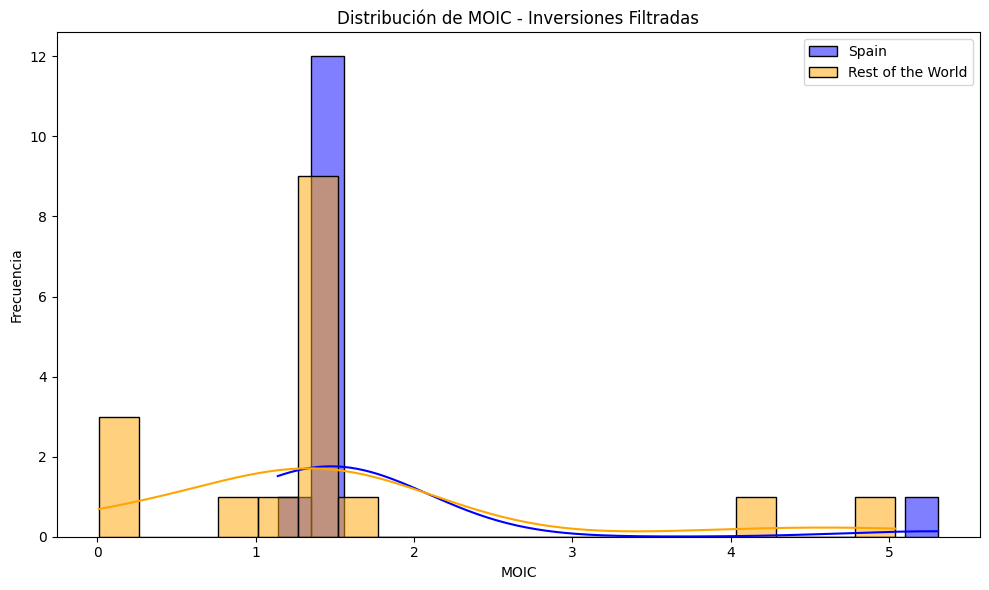

C:\Users\juanmoreno\AppData\Local\Temp\ipykernel_23456\497316276.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Geo", y="MoIC", data=filtered_moic_df, palette="coolwarm")


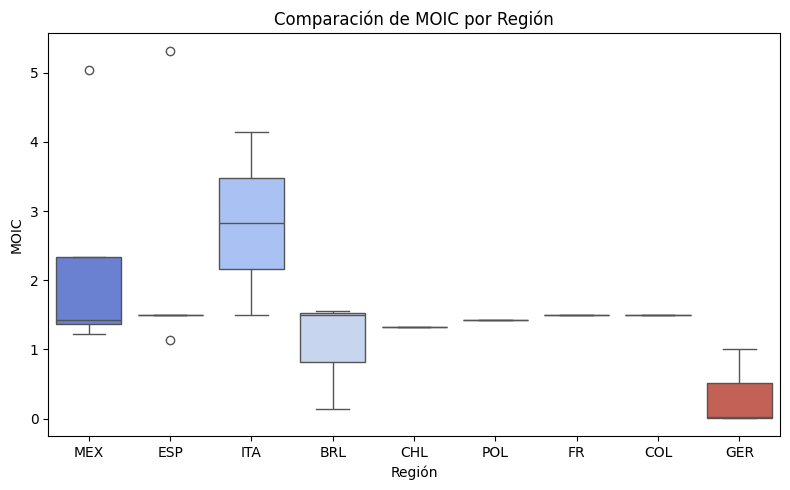

C:\Users\juanmoreno\AppData\Local\Temp\ipykernel_23456\497316276.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=moic_mean_by_region.values, y=moic_mean_by_region.index, palette="coolwarm", edgecolor="black")


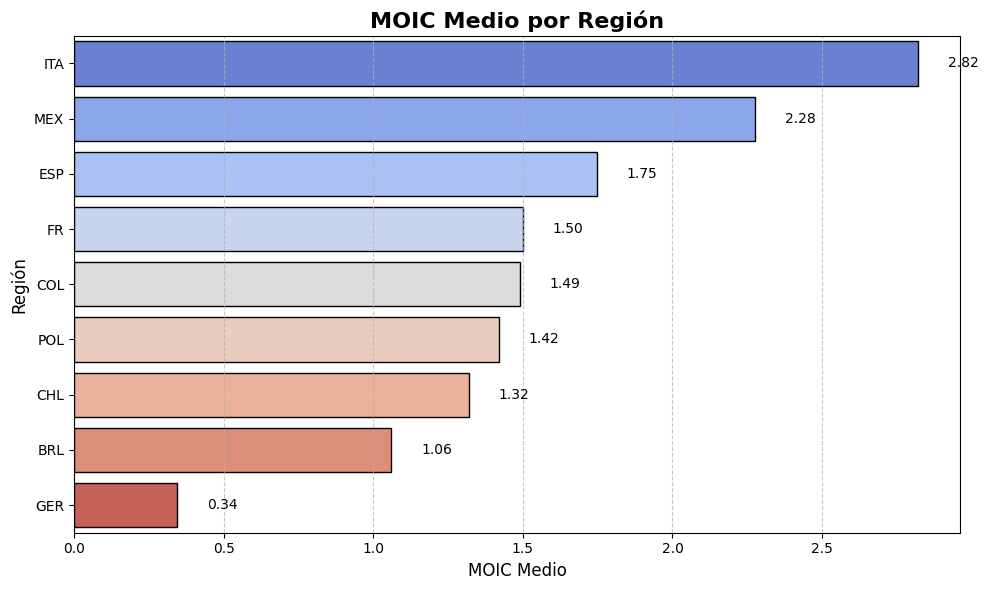

In [161]:
# Filtrar datos con MOIC > 0 y Status relevantes
filtered_moic_df = df_sorted[
    (df_sorted["MoIC"] > 0) & 
    (df_sorted["Status"].isin(["Sold", "Dead-End", "Not Participating"]))
]

# Estadísticas descriptivas para España y resto del mundo
espana_moic = filtered_moic_df[filtered_moic_df["Geo"] == "ESP"]
resto_moic = filtered_moic_df[filtered_moic_df["Geo"] != "ESP"]

# Calcular estadísticas descriptivas
moic_stats = {
    "España": espana_moic["MoIC"].describe(),
    "Resto del mundo": resto_moic["MoIC"].describe()
}
print("Estadísticas Descriptivas de MOIC:")
print(moic_stats)

# Visualización: Distribución de MOIC
plt.figure(figsize=(10, 6))
sns.histplot(espana_moic["MoIC"], color="blue", label="Spain", kde=True, bins=20)
sns.histplot(resto_moic["MoIC"], color="orange", label="Rest of the World", kde=True, bins=20)
plt.title("Distribución de MOIC - Inversiones Filtradas")
plt.xlabel("MOIC")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico de cajas para comparar MOIC por región
plt.figure(figsize=(8, 5))
sns.boxplot(x="Geo", y="MoIC", data=filtered_moic_df, palette="coolwarm")
plt.title("Comparación de MOIC por Región")
plt.xlabel("Región")
plt.ylabel("MOIC")
plt.tight_layout()
plt.show()

# Calcular el MOIC medio por región
moic_mean_by_region = filtered_moic_df.groupby("Geo")["MoIC"].mean().sort_values(ascending=False)

# Crear el gráfico compacto con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=moic_mean_by_region.values, y=moic_mean_by_region.index, palette="coolwarm", edgecolor="black")

# Personalizar el diseño
plt.title("MOIC Medio por Región", fontsize=16, fontweight="bold")
plt.xlabel("MOIC Medio", fontsize=12)
plt.ylabel("Región", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Agregar etiquetas a las barras
for index, value in enumerate(moic_mean_by_region.values):
    plt.text(value + 0.1, index, f"{value:.2f}", va="center", fontsize=10)

plt.tight_layout()
plt.show()


### **Indicador 2: IRR (Internal Rate of Return)**

C:\Users\juanmoreno\AppData\Local\Temp\ipykernel_23456\2961004975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted[col] = pd.to_datetime(df_sorted[col], errors="coerce")
C:\Users\juanmoreno\AppData\Local\Temp\ipykernel_23456\2961004975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted[col] = pd.to_datetime(df_sorted[col], errors="coerce")
C:\Users\juanmoreno\AppData\Local\Temp\ipykernel_23456\2961004975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

Estadísticas Descriptivas de IRR:
{'España': count    11.000000
mean      0.113962
std       0.101992
min      -0.193556
25%       0.144714
50%       0.144714
75%       0.144714
max       0.144714
Name: IRR, dtype: float64, 'Resto del mundo': count    13.000000
mean      0.273269
std       0.356181
min       0.069321
25%       0.122929
50%       0.142502
75%       0.144714
max       1.157111
Name: IRR, dtype: float64}


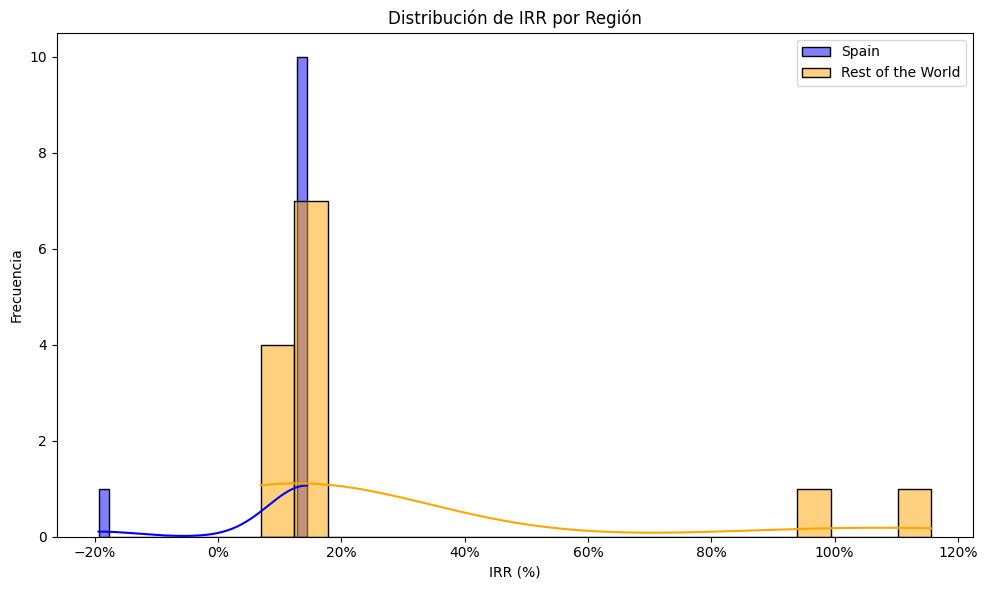

C:\Users\juanmoreno\AppData\Local\Temp\ipykernel_23456\2961004975.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Geo", y=filtered_irr_df["IRR"] * 100, data=filtered_irr_df, palette="coolwarm")


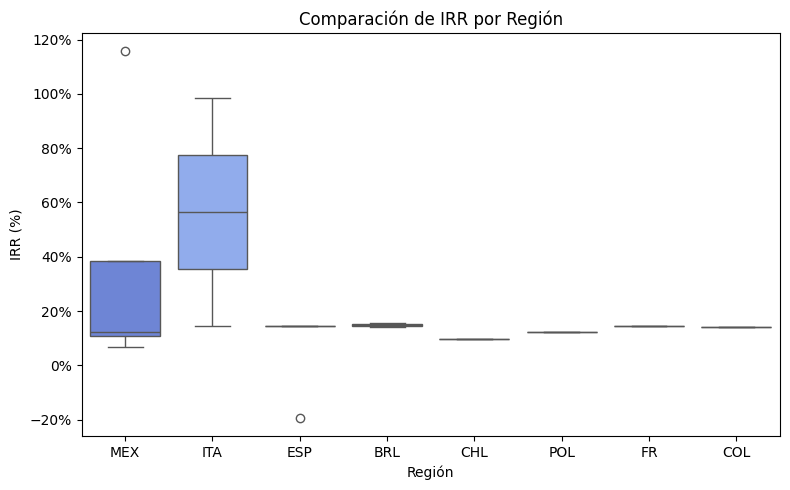

In [162]:
# Convertir fechas al formato datetime
date_columns = ["Searching Phase Investment Date", "Acquisition Date", "Liquidation Date"]
for col in date_columns:
    df_sorted[col] = pd.to_datetime(df_sorted[col], errors="coerce")

# Filtrar datos relevantes
filtered_irr_df = df_sorted[
    (df_sorted["Status"].isin(["Sold", "Not Participating"])) &
    (df_sorted["Invested Search Phase (€)"] > 0) &
    (df_sorted["Return (€)"] > 0)
]

# Función para calcular IRR con manejo de fechas faltantes
def calculate_irr(investment_date, acquisition_date, liquidation_date, search_investment, acquisition_investment, step_up, return_value, post_acquisition_investment):
    try:
        # Crear flujos de caja y fechas
        cash_flows = []
        dates = []

        # Searching phase
        if pd.notnull(investment_date):
            cash_flows.append(-search_investment)
            dates.append(investment_date)

        # Acquisition phase (investment + step-up)
        if pd.notnull(acquisition_date):
            acquisition_total = acquisition_investment + step_up
            cash_flows.append(-acquisition_total)
            dates.append(acquisition_date)

        # Post-acquisition investments
        if pd.notnull(acquisition_date) and pd.notnull(liquidation_date) and not np.isnan(post_acquisition_investment):
            midpoint_date = acquisition_date + (liquidation_date - acquisition_date) / 2
            cash_flows.append(-post_acquisition_investment)
            dates.append(midpoint_date)

        # Return value (positive cash flow)
        if pd.notnull(liquidation_date):
            cash_flows.append(return_value)
            dates.append(liquidation_date)

        # Verificar que haya suficientes datos para calcular IRR
        if len(cash_flows) < 2:
            return None

        # Convertir fechas a años desde la primera fecha
        years = [(date - dates[0]).days / 365.0 for date in dates]

        # Calcular IRR
        return npf.irr(cash_flows)
    except:
        return None

# Aplicar función al DataFrame
filtered_irr_df["IRR"] = filtered_irr_df.apply(lambda row: calculate_irr(
    row["Searching Phase Investment Date"],
    row["Acquisition Date"],
    row["Liquidation Date"],
    row["Invested Search Phase (€)"],
    row["Investment at acquisition (€)"],
    row["Step-Up re-invested (€)"],
    row["Return (€)"],
    row["Post-acquisition Investments (€)"]
), axis=1)

# Filtrar datos válidos con IRR calculado
filtered_irr_df = filtered_irr_df[filtered_irr_df["IRR"].notnull()]

# Comparar IRR por región
espana_irr = filtered_irr_df[filtered_irr_df["Geo"] == "ESP"]
resto_irr = filtered_irr_df[filtered_irr_df["Geo"] != "ESP"]

# Estadísticas descriptivas
irr_stats = {
    "España": espana_irr["IRR"].describe(),
    "Resto del mundo": resto_irr["IRR"].describe()
}
print("Estadísticas Descriptivas de IRR:")
print(irr_stats)

# Histograma: Distribución de IRR por región
plt.figure(figsize=(10, 6))
sns.histplot(espana_irr["IRR"] * 100, color="blue", label="Spain", kde=True, bins=20)
sns.histplot(resto_irr["IRR"] * 100, color="orange", label="Rest of the World", kde=True, bins=20)
plt.title("Distribución de IRR por Región")
plt.xlabel("IRR (%)")
plt.ylabel("Frecuencia")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico de cajas: Comparación de IRR por región
plt.figure(figsize=(8, 5))
sns.boxplot(x="Geo", y=filtered_irr_df["IRR"] * 100, data=filtered_irr_df, palette="coolwarm")
plt.title("Comparación de IRR por Región")
plt.xlabel("Región")
plt.ylabel("IRR (%)")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()


### **Indicador 3: Ratios Financieros (EV/ y EQ/)**

Promedios de Ratios Financieros - Datos Históricos (por Geo):
1        EV/SLS EV/EBITDA EV/Avg2 CF EQ/EBITDA EQ/avg2 CF
Geo                                                      
AUS    0.863333  3.596667   5.213333  1.543333   2.193333
BEL        1.97       6.6        8.1      2.42       2.86
BRL    1.796667     5.532   9.623333     3.114      5.406
CAN        0.75      4.43       9.13      1.79        3.7
CHL       0.685     3.525       5.25      2.83       4.17
COL        2.87  6.392857   9.534286  3.688571   5.578571
CZECH      1.92  5.236667   6.673333  1.666667   2.096667
DACH       3.19      8.21      10.25      3.16       3.95
EGY        1.39      6.41      15.16       3.8      8.675
ESP    1.454595  5.459324   9.656164  2.523108   4.485479
ESTON      0.75      6.25       7.12       3.0       3.41
FR     1.523125  5.765294     8.4475  2.642941    3.84875
GER       1.534      6.01      8.852     2.169      3.182
HOL        1.52      4.37       6.01       1.7       2.28
ITA    1.8

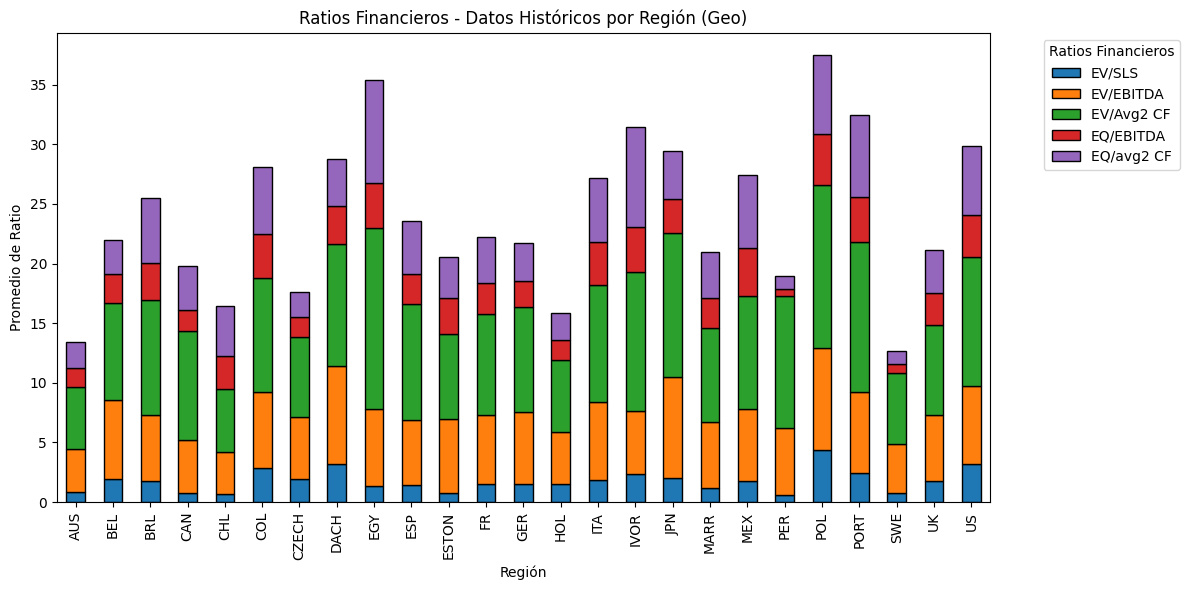

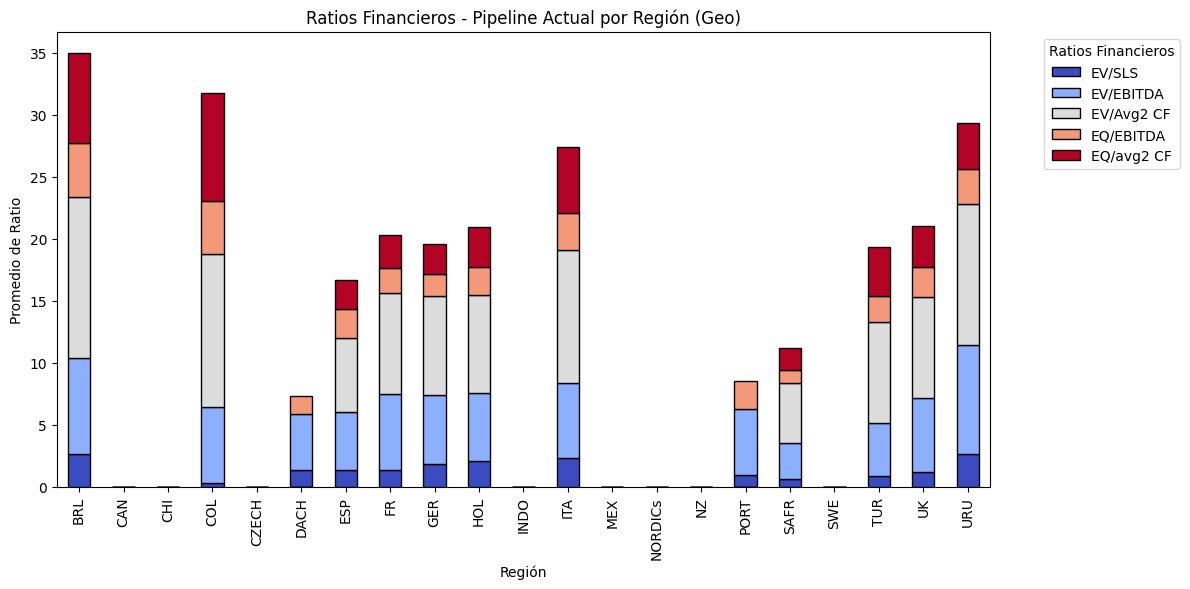

C:\Users\juanmoreno\AppData\Local\Temp\ipykernel_23456\2999330696.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted["Region"] = df_sorted["Geo"].apply(lambda x: "ESP" if x == "ESP" else "Resto del mundo")


<Figure size 1000x600 with 0 Axes>

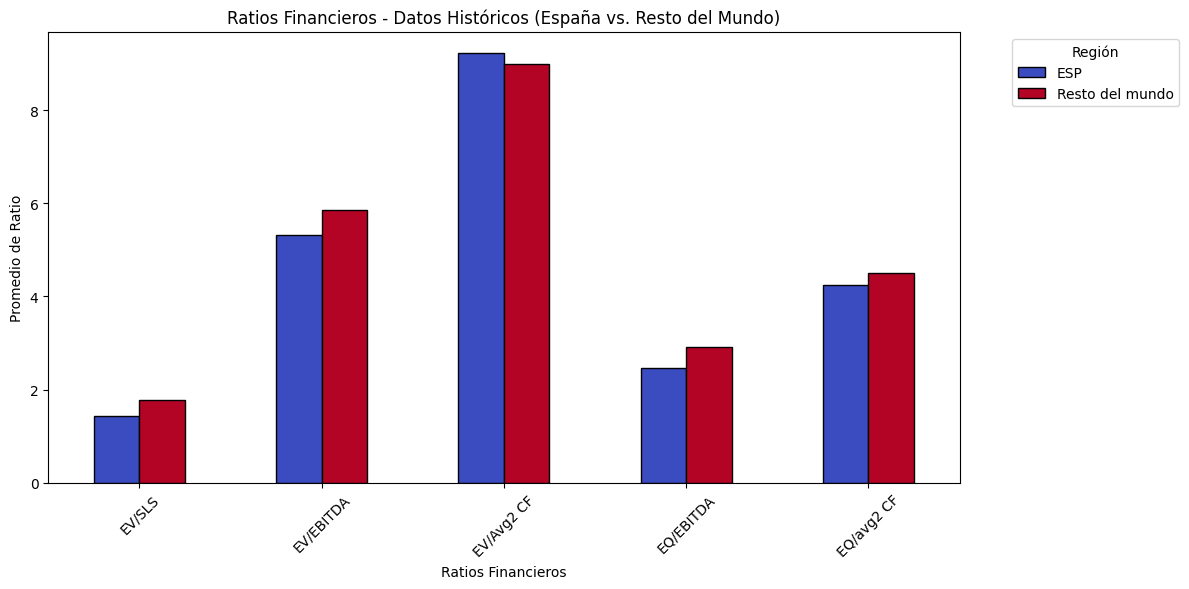

<Figure size 1000x600 with 0 Axes>

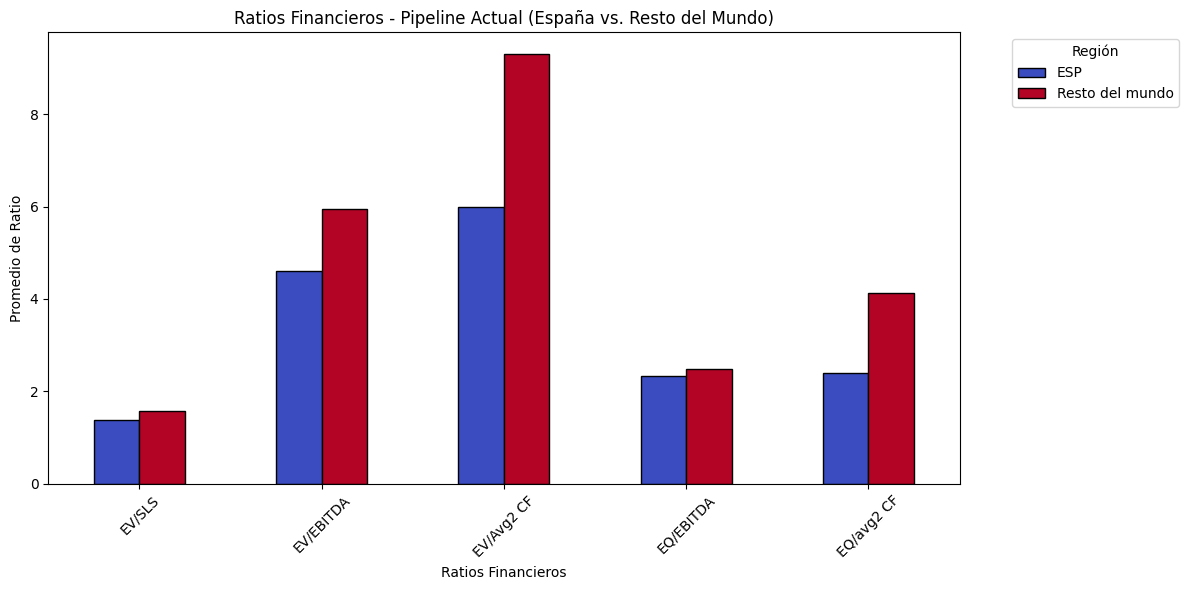

In [164]:
# Definir las columnas de ratios financieros
ratio_columns = ["EV/SLS", "EV/EBITDA", "EV/Avg2 CF", "EQ/EBITDA", "EQ/avg2 CF"]

# Filtrar datos históricos y del pipeline actual
historical_statuses = [
    "Sold", "Acquired", "Eq Gap rejected", "Not Participating", 
    "Not-executed"
]
pipeline_statuses = ["Due Diligence", "Searching Phase", "DD SelfFund/EqGap", "Self funded"]

# Crear DataFrames separados
historical_df = df_sorted[df_sorted["Status"].isin(historical_statuses)].copy()
pipeline_df = df_sorted[df_sorted["Status"].isin(pipeline_statuses)].copy()

# Calcular promedios de ratios por región para datos históricos
historical_means_geo = historical_df.groupby("Geo")[ratio_columns].mean()
historical_means_geo_group = historical_df.groupby("Geo Group")[ratio_columns].mean()

# Calcular promedios de ratios por región para el pipeline actual
pipeline_means_geo = pipeline_df.groupby("Geo")[ratio_columns].mean()
pipeline_means_geo_group = pipeline_df.groupby("Geo Group")[ratio_columns].mean()

# Mostrar resultados
print("Promedios de Ratios Financieros - Datos Históricos (por Geo):")
print(historical_means_geo)
print("\nPromedios de Ratios Financieros - Datos Históricos (por Geo Group):")
print(historical_means_geo_group)

print("\nPromedios de Ratios Financieros - Pipeline Actual (por Geo):")
print(pipeline_means_geo)
print("\nPromedios de Ratios Financieros - Pipeline Actual (por Geo Group):")
print(pipeline_means_geo_group)

# Gráfico de barras apiladas para los ratios financieros históricos por Geo
historical_means_geo.plot(kind="bar", figsize=(12, 6), edgecolor="black", stacked=True)
plt.title("Ratios Financieros - Datos Históricos por Región (Geo)")
plt.xlabel("Región")
plt.ylabel("Promedio de Ratio")
plt.legend(title="Ratios Financieros", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Gráfico de barras apiladas para los ratios financieros del pipeline por Geo
pipeline_means_geo.plot(kind="bar", figsize=(12, 6), edgecolor="black", stacked=True, colormap="coolwarm")
plt.title("Ratios Financieros - Pipeline Actual por Región (Geo)")
plt.xlabel("Región")
plt.ylabel("Promedio de Ratio")
plt.legend(title="Ratios Financieros", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Crear una columna categórica para separar España del resto del mundo
df_sorted["Region"] = df_sorted["Geo"].apply(lambda x: "ESP" if x == "ESP" else "Resto del mundo")

# Calcular promedios de ratios financieros para datos históricos
historical_means_region = df_sorted.groupby("Region")[ratio_columns].mean()

# Calcular promedios de ratios financieros para el pipeline actual
pipeline_means_region = pipeline_df.groupby("Region")[ratio_columns].mean()

# Visualización: Gráficos de barras para datos históricos
plt.figure(figsize=(10, 6))
historical_means_region.T.plot(kind="bar", figsize=(12, 6), colormap="coolwarm", edgecolor="black")
plt.title("Ratios Financieros - Datos Históricos (España vs. Resto del Mundo)")
plt.xlabel("Ratios Financieros")
plt.ylabel("Promedio de Ratio")
plt.xticks(rotation=45)
plt.legend(title="Región", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Visualización: Gráficos de barras para el pipeline actual
plt.figure(figsize=(10, 6))
pipeline_means_region.T.plot(kind="bar", figsize=(12, 6), colormap="coolwarm", edgecolor="black")
plt.title("Ratios Financieros - Pipeline Actual (España vs. Resto del Mundo)")
plt.xlabel("Ratios Financieros")
plt.ylabel("Promedio de Ratio")
plt.xticks(rotation=45)
plt.legend(title="Región", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



### **Indicador 4: Porcentaje de Liquidaciones sin retornos**

Porcentaje de Liquidaciones por Región (Geo):
Geo
ARG        33.333333
AUS         0.000000
BEL        20.000000
BRL         4.687500
CAN         0.000000
CHI         0.000000
CHL         0.000000
COL        13.333333
CZECH      12.500000
DACH        7.142857
EGY        20.000000
EIR         0.000000
ESP         2.392344
ESTON       0.000000
FR          0.000000
GER        19.230769
GRE         0.000000
HOL         0.000000
INDIA       0.000000
INDO        0.000000
ISRL        0.000000
ITA         0.000000
IVOR        0.000000
JPN         0.000000
KEY         0.000000
KSA         0.000000
MARR       20.000000
MEX         3.846154
NORDICs     0.000000
NZ          0.000000
PER         0.000000
POL         0.000000
PORT        0.000000
RUS         0.000000
SAFR        0.000000
SING        0.000000
SWE         0.000000
SWIZ        0.000000
TAI         0.000000
TUR         0.000000
UAE         0.000000
UK          2.739726
URU         0.000000
US         20.000000
Name: Status, dtype: float

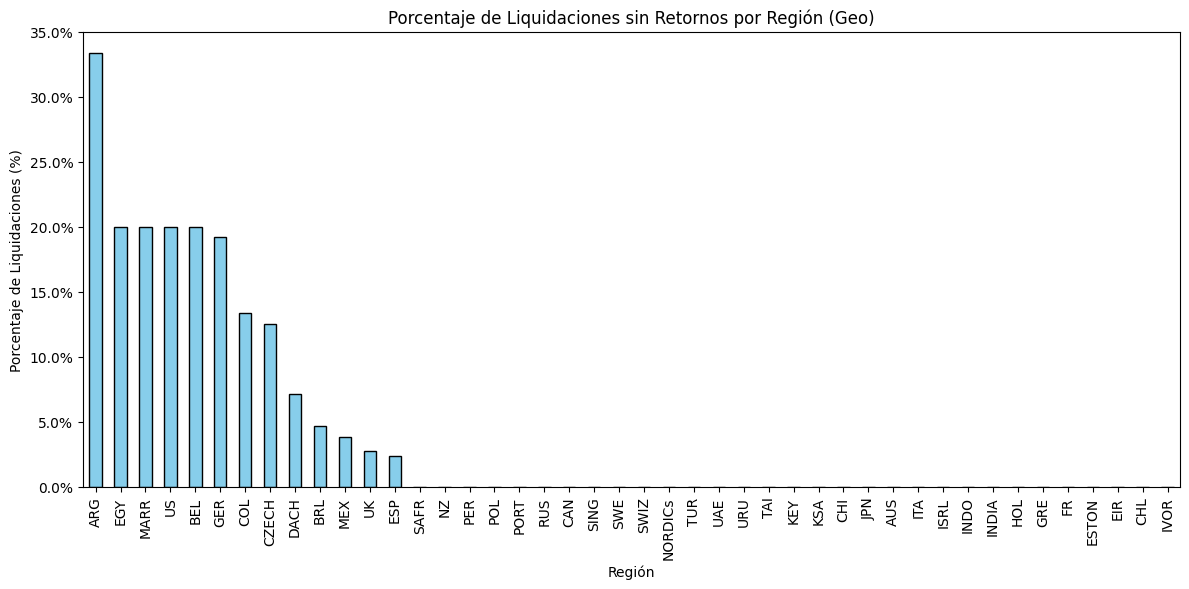

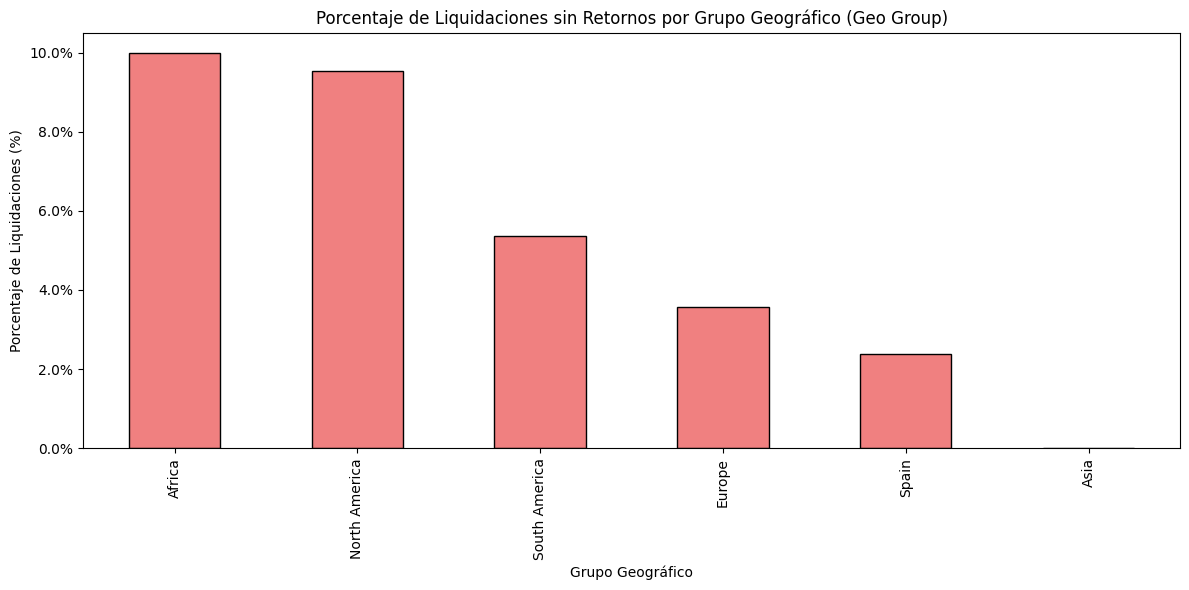

In [133]:
# Filtrar datos con Status "Dead-End"
dead_end_df = df_sorted[df_sorted["Status"] == "Dead-End"]

# Calcular total de inversiones y liquidaciones por región
total_investments_geo = df_sorted.groupby("Geo")["Status"].count()
dead_end_investments_geo = dead_end_df.groupby("Geo")["Status"].count()

# Calcular el porcentaje de liquidaciones por región
liquidation_percentage_geo = (dead_end_investments_geo / total_investments_geo * 100).fillna(0)

# Calcular total de inversiones y liquidaciones por grupo geográfico
total_investments_geo_group = df_sorted.groupby("Geo Group")["Status"].count()
dead_end_investments_geo_group = dead_end_df.groupby("Geo Group")["Status"].count()

# Calcular el porcentaje de liquidaciones por grupo geográfico
liquidation_percentage_geo_group = (dead_end_investments_geo_group / total_investments_geo_group * 100).fillna(0)

# Mostrar resultados
print("Porcentaje de Liquidaciones por Región (Geo):")
print(liquidation_percentage_geo)

print("\nPorcentaje de Liquidaciones por Grupo Geográfico (Geo Group):")
print(liquidation_percentage_geo_group)

# Visualización: Porcentaje de liquidaciones por región
plt.figure(figsize=(12, 6))
liquidation_percentage_geo.sort_values(ascending=False).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Porcentaje de Liquidaciones sin Retornos por Región (Geo)")
plt.xlabel("Región")
plt.ylabel("Porcentaje de Liquidaciones (%)")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()

# Visualización: Porcentaje de liquidaciones por grupo geográfico
plt.figure(figsize=(12, 6))
liquidation_percentage_geo_group.sort_values(ascending=False).plot(kind="bar", color="lightcoral", edgecolor="black")
plt.title("Porcentaje de Liquidaciones sin Retornos por Grupo Geográfico (Geo Group)")
plt.xlabel("Grupo Geográfico")
plt.ylabel("Porcentaje de Liquidaciones (%)")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()
